# Lab 8: Define and Solve an ML Problem of Your Choosing

In [45]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [46]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# Load the dataset
df = pd.read_csv(airbnbDataSet_filename)

# Display the first few rows of the dataframe
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
    - **Dataset**: Airbnb NYC "listings" data set
3. What will you be predicting? What is the label?
    - **Prediction Goal**: Predicting `price` of the listing
    - **Label**: The price column, which is a continuous variable representing the rental cost of the listing.
5. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
    - This is a **Supervised learning** problem, more specifically it is a **Regression** problem since we are predicting a continuous value.
7. What are your features? (note: this list may change after your explore your data)
    - **Host Features**: `host_response_rate`, `host_acceptance_rate`, `host_listings_count`.
    - **Property Features**: `accommodates`, `bathrooms`, `bedrooms`, `beds`, `availability_30`, `number_of_reviews`, `review_scores_rating`.
    - **Categorical Features**: `room_type` (one-hot encoded to convert categorical data into numerical format).
9. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?
    - Predicting the rental price accurately is crucial for both hosts and guests. For hosts, it helps in setting competitive and optimal pricing, ensuring maximum occupancy while achieving their financial goals. For guests, it aids in finding suitable accommodations within their budget. An accurate pricing model enhances the overall user experience on platforms like Airbnb by matching price expectations with market trends and listing attributes. Additionally, it can help in optimizing pricing strategies and improving the platform's profitability.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

In [48]:
#use df.describe() to display the dataset characteristics
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


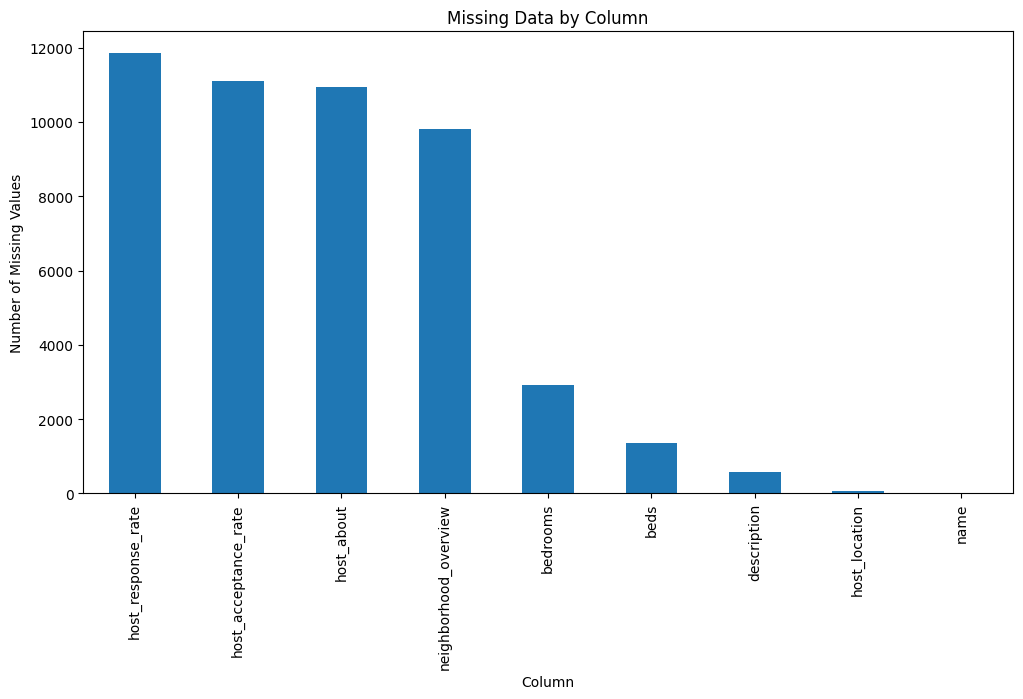

In [49]:
#Using matplotlib for Custom Missing Data Plots
def plot_missing_data(df):
    plt.figure(figsize=(12, 6))
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_data.sort_values(ascending=False).plot(kind='bar')
    plt.title('Missing Data by Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Missing Values')
    plt.show()

plot_missing_data(df)

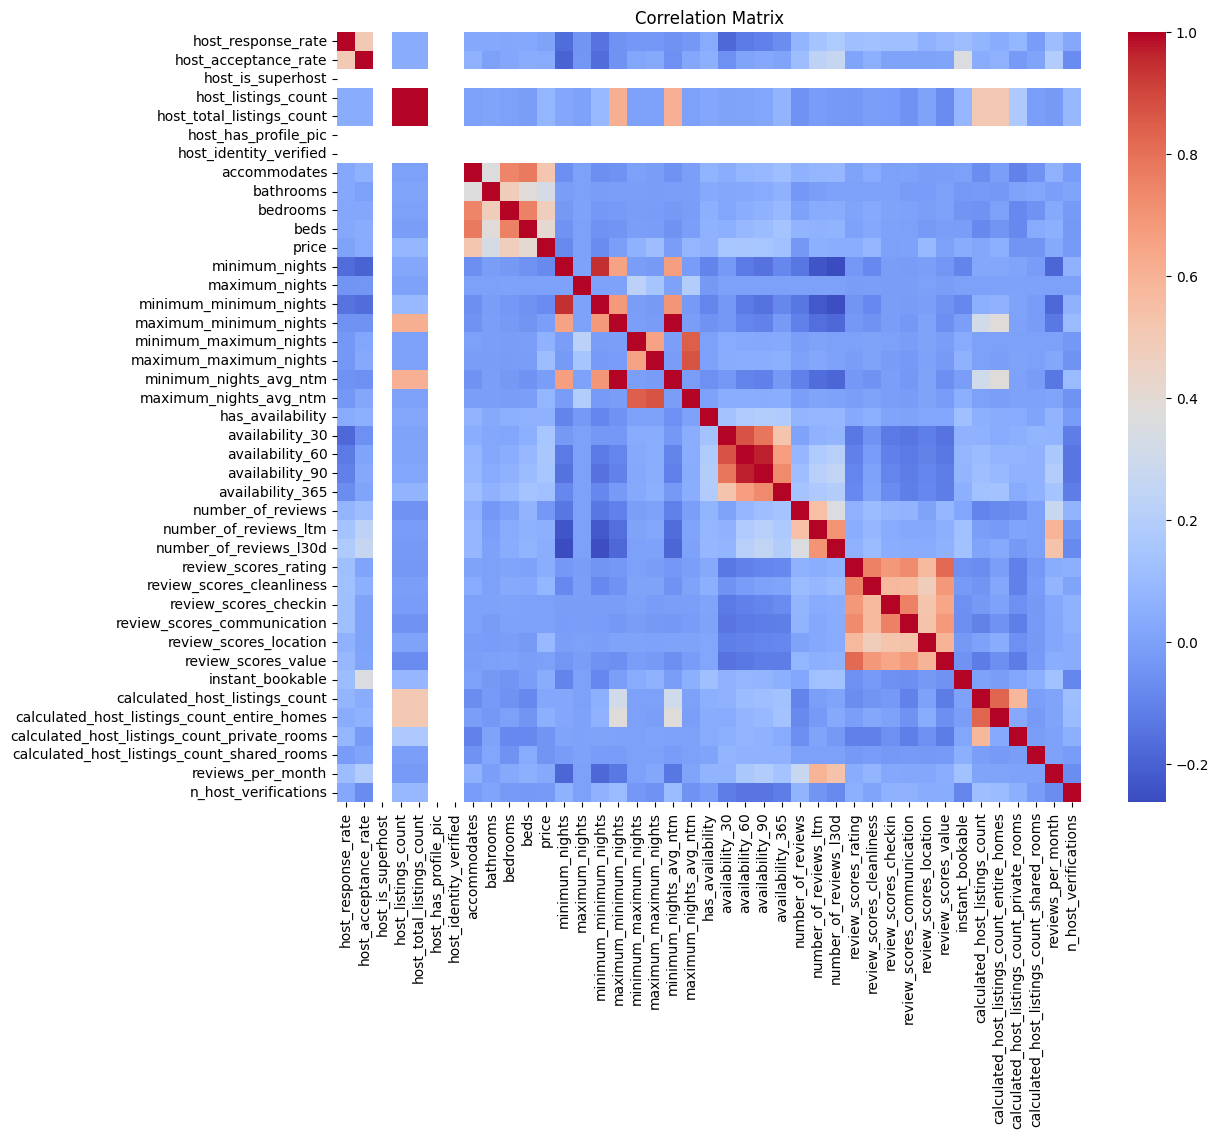

In [50]:
# Using Seabirn to dispaly the Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

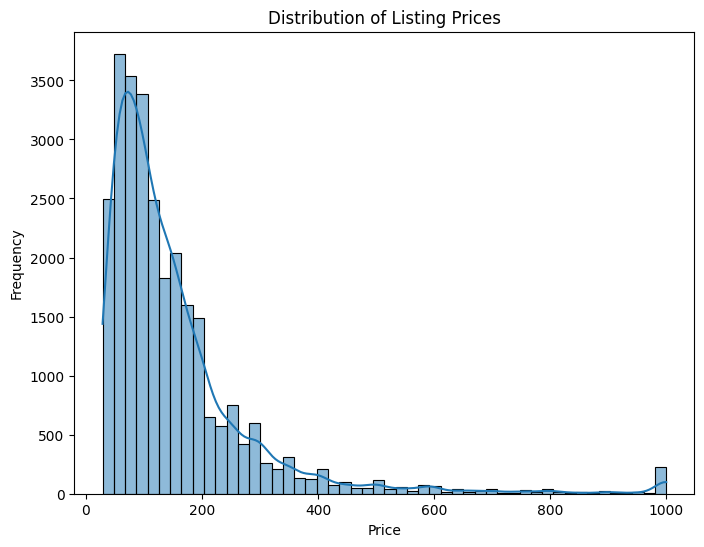

In [51]:
# Using Matplotlib to plot the Distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

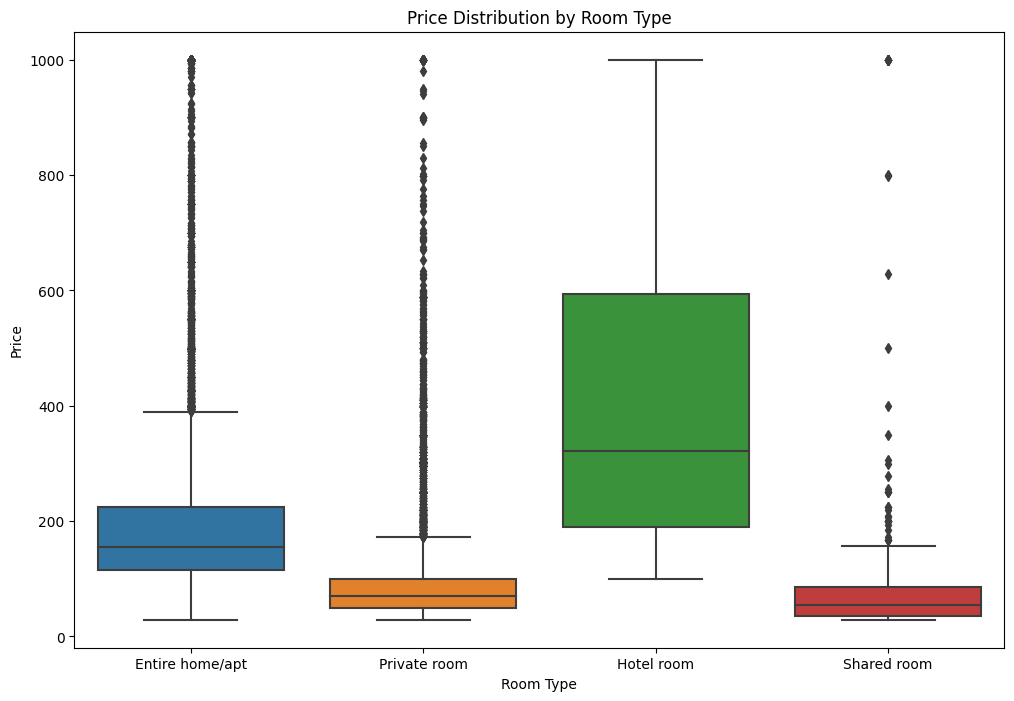

In [52]:
# Boxplot of price by room type
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

1. Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?
   - **Features to Keep**:
        - Host Features: host_response_rate, host_acceptance_rate, host_listings_count.
        - Property Features: accommodates, bathrooms, bedrooms, beds, availability_30, number_of_reviews, review_scores_rating.
        - Categorical Features: room_type (one-hot encoded to include it as numerical features).
        - Location Features: Latitude and longitude derived from the location column.
    - **Features to Remove**:
        - Missing Data: Columns with excessive missing values or minimal predictive power such as description, neighborhood_overview, host_about.
        - Redundant or Low Variance Features: Columns like minimum_nights, maximum_nights, which might not add significant value to predicting price if their variance is low.
    - **Reason for Selection**: Features retained have been chosen based on their relevance and potential impact on rental price. Those with high missingness or low variance might not contribute meaningfully to the model's predictive power.
3. Explain different data preparation techniques that you will use to prepare your data for modeling.
   - **Handling Missing Values**: Fill missing values for numerical features with mean or median values. For categorical features with missing values, consider imputing with the most frequent value or using a placeholder category.
    - **Scaling Features**: Normalize or standardize numerical features to ensure they are on a comparable scale, which is especially important for models sensitive to feature scales.
    - **Feature Selection**: Use techniques such as correlation analysis and feature importance from preliminary models to identify and select the most significant features.
5. What is your model (or models)?
   - Model Choices:
        - Random Forest Regression
        - Linear Regression
        - Decision Tree Regression
        - Gradient Boosting Regression
   - Reason: Each model has distinct strengths:
        - Random Forest Regression: Handles non-linearity well and is less prone to overfitting. It manages mixed feature types and provides feature importance metrics.
        - Linear Regression: Provides a simple and interpretable model, useful for understanding linear relationships and benchmarking against more complex models.
        - Decision Tree Regression: Offers a clear, interpretable model and captures non-linear relationships but can be prone to overfitting.
        - Gradient Boosting Regression: Combines weak learners to create a strong predictive model, often achieving high performance by focusing on errors from previous iterations.
7. Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.
   - **Training Plan**:
        - Split the dataset into training and validation sets.
        - Train the different models on the training set.
        - Tune hyperparameters using techniques such as Grid Search or Random Search to find the optimal model configuration.
    - **Evaluation Metrics**:
        - Evaluate model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R^2 score to understand how well the model predicts rental prices.
    - **Improvement Plan**:
        - Perform feature importance analysis to identify and possibly include or exclude features based on their significance.
        - Experiment with other regression models to compare performance.
        - Implement cross-validation to ensure the model's robustness and generalizability across different subsets of the data.
        - Address any model weaknesses identified during evaluation, such as bias or variance issues, by adjusting hyperparameters or adding new features.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [54]:
# Drop rows with missing target values
df = df.dropna(subset=['price'])
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [55]:
# Identify numeric columns and keep only those in the dataframe
numeric_columns = df.select_dtypes(include=['number']).columns
df = df[numeric_columns]

In [56]:
# Fill missing values in numerical columns 
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [57]:
# Define features and target
y = df['price']
X = df.drop(['price'], axis=1)

In [58]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the target variable
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [59]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.20, random_state=1234)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", X_test.shape)

X_train shape: (22417, 35)
X_test shape: (5605, 35)
y_train shape: (22417, 1)
y_test shape: (5605, 35)


### Linear Regressesion 

In [60]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_lr_pred = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f'[LR] Root Mean Squared Error: {lr_rmse}')
print(f'[LR] R2: {lr_r2}')

[LR] Root Mean Squared Error: 0.11676511232696479
[LR] R2: 0.38659896941388816


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###  Decision Tree Regressor with Grid Search

In [61]:
# Define parameter grid
param_grid = {
    'max_depth': [4, 8],
    'min_samples_leaf': [25, 50]
}

# Initialize and fit Grid Search
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
dt_grid_search = dt_grid.fit(X_train, y_train)

# Best model parameters
dt_best_params = dt_grid_search.best_params_

# Initialize the best Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

# Make predictions
y_dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print(f'[DT] Root Mean Squared Error: {dt_rmse}')
print(f'[DT] R2: {dt_r2}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[DT] Root Mean Squared Error: 0.11098344839923634
[DT] R2: 0.4458405699298157


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###  Gradient Boosting Decision Trees

In [62]:
# Initialize and train the Gradient Boosting model
gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
gbdt_model.fit(X_train, y_train)

# Make predictions
y_gbdt_pred = gbdt_model.predict(X_test)

# Evaluate the model
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print(f'[GBDT] Root Mean Squared Error: {gbdt_rmse}')
print(f'[GBDT] R2: {gbdt_r2}')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[GBDT] Root Mean Squared Error: 0.10143467039854429
[GBDT] R2: 0.5370957766677285


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Regressor

In [63]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'[RF] Root Mean Squared Error: {rf_rmse}')
print(f'[RF] R2: {rf_r2}')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[RF] Root Mean Squared Error: 0.09837771220467684
[RF] R2: 0.5645766288663505


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###  Stacking Regressor

In [64]:
# Define base estimators for stacking
estimators = [
    ("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
    ("LR", LinearRegression())
]

# Initialize and train the Stacking Regressor
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_pred = stacking_model.predict(X_test)

# Evaluate the model
stack_rmse = mean_squared_error(y_test, stacking_pred, squared=False)
stack_r2 = r2_score(y_test, stacking_pred)

print(f'[Stacking] Root Mean Squared Error: {stack_rmse}')
print(f'[Stacking] R2: {stack_r2}')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py:967: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Stacking] Root Mean Squared Error: 0.10765110085298472
[Stacking] R2: 0.47861894192288124


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Visualization and Comparison

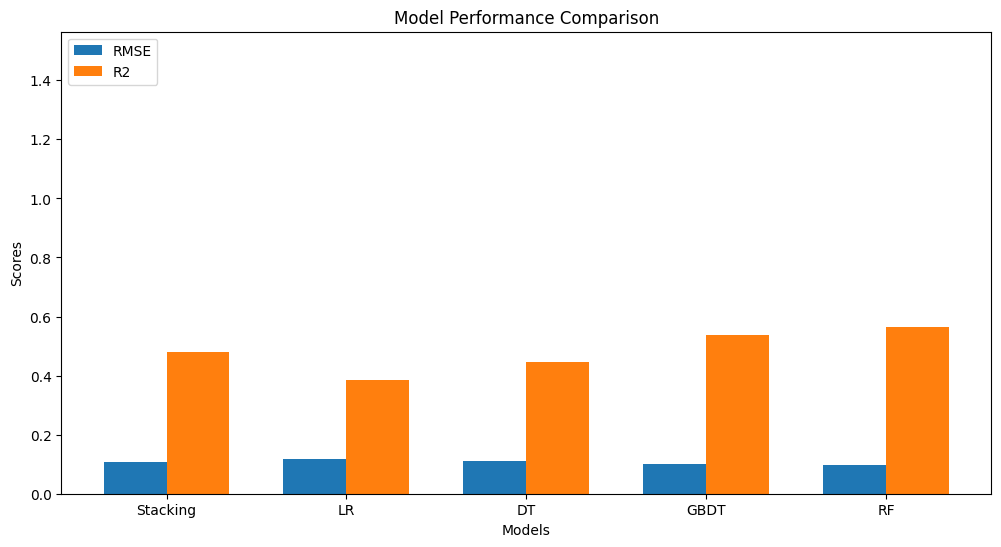

In [66]:
# RMSE and R2 Results
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
models = ['Stacking', 'LR', 'DT', 'GBDT', 'RF']

# Plotting RMSE
plt.figure(figsize=(12, 6))
width = 0.35
rg = np.arange(len(models))

plt.bar(rg, RMSE_Results, width, label='RMSE')
plt.bar(rg + width, R2_Results, width, label='R2')
plt.xticks(rg + width / 2, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.ylim([0, max(max(RMSE_Results), max(R2_Results)) + 1])
plt.legend(loc='upper left')
plt.show()

### Summary 

1. **Linear Regression (LR)**: This model achieved a Root Mean Squared Error (RMSE) of 0.117 and an R² score of 0.387. The model's performance indicates a moderate fit with the data, but there may be room for improvement.

2. **Decision Tree Regressor (DT)**: With grid search optimization, the Decision Tree model reached an RMSE of 0.111 and an R² score of 0.446. The model benefits from hyperparameter tuning, demonstrating better performance than Linear Regression.

3. **Gradient Boosting Decision Trees (GBDT)**: This model achieved an RMSE of 0.101 and an R² score of 0.537. It performed better than both Linear Regression and Decision Tree Regressors, indicating its effectiveness in capturing complex patterns in the data.

4. **Random Forest Regressor (RF)**: The Random Forest model had the best performance with an RMSE of 0.098 and an R² score of 0.565. Its robust nature and ability to handle non-linearity make it the top performer among the models evaluated.

5. **Stacking Regressor**: Combining Decision Tree and Linear Regression as base models, the Stacking Regressor achieved an RMSE of 0.108 and an R² score of 0.479. Although it improved upon the basic Linear Regression, it did not surpass the Random Forest in performance.

In the visualization, Random Forest exhibited the lowest RMSE and highest R², making it the most effective model for this task. The bar chart comparison highlights the performance variations among the models, showing that ensemble methods like Random Forest and Gradient Boosting generally offer better accuracy than simpler models like Linear Regression.